<a href="https://colab.research.google.com/github/MallyRust/ML-Projects/blob/project2/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Medical Insurance Dataset provides data on the different attributes of patients and how much money the costs their insurance companies incurred. You task is to predict insurance charges ('charges'). Each of the text comments that some of the sub tasks require should not be more than 150 words.

Your project's grade breakdown is the following:

1. Build OLS regression and get at least 70% of adjusted R squared. (15%)
2. Explain OLS regression output -  R-squared and adjusted R squared and their differences. (10%)
3. Explain OLS regression output - beta coefficients. Also write the OLS function formula.  Do all of your beta coefficients seem logical? Comment on the beta coefficients you recieved. (20%)
4. Explain OLS regression output - p-values. Indicate which of your p-values are above the threshold (choose 0.05). Why might it be this way? (10%)
5. Write the OLS function formula - confidence intervals. Comment on the confidence intervals you recieved. (5%)
6. Calculate SST, SSR and SSE. What do these metrics mean? Comment on your SST, SSR and SSE.(5%)
7. Calculate MAE, MSE, RMSE. Your MAE should be about 3500-4500. Which ones are the best metric in your case? Comment on your MAE, MSE, RMSE. (20%)
8. Build residual plot and comment it. (5%)
9. Build actual vs predicted charges plot and comment it. (5%)
10. Briefly explain what are degrees of freedom and dummy variables trap (5%)



In [15]:
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings("ignore")
import sys, os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [16]:
#read file
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Task1

In [18]:
# Convert categorical variables to dummy variables
data = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Split the data into independent variables (X) and the dependent variable (Y)
X = data.drop('charges', axis=1)
Y = data['charges']

In [19]:
# Add a constant to the independent variables (intercept)
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(Y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Fri, 01 Sep 2023   Prob (F-statistic):               0.00
Time:                        10:07:30   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.194e+04    987.819  

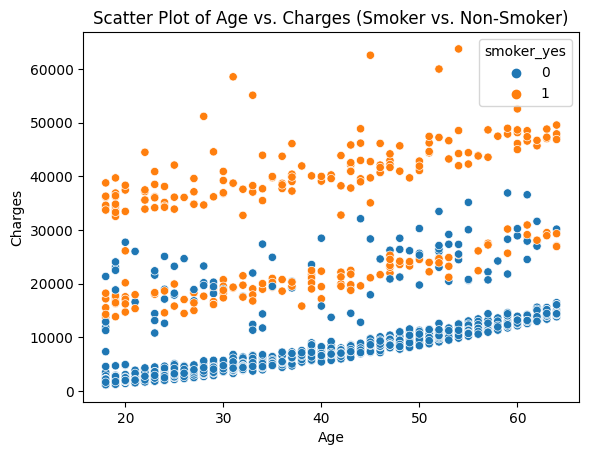

In [20]:
# Scatter plot of age vs. charges
sns.scatterplot(data=data, x='age', y='charges', hue='smoker_yes')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Scatter Plot of Age vs. Charges (Smoker vs. Non-Smoker)')
plt.show()

In [21]:
#Split the data into a training set and a testing set.

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [22]:
#Create and fit the OLS regression model

model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [23]:
# Predict on the test set
Y_pred = model.predict(X_test)

# Calculate R-squared
r_squared = r2_score(Y_test, Y_pred)

# Calculate the number of independent variables
n = X_test.shape[0]

# Calculate the number of independent variables used in the model
k = X_test.shape[1]

# Calculate the adjusted R-squared
adjusted_r_squared = 1 - (1 - r_squared) * ((n - 1) / (n - k - 1))

print("R-squared:", r_squared)
print("Adjusted R-squared:", adjusted_r_squared)


R-squared: 0.7835929767120723
Adjusted R-squared: 0.7760438945043538


# Task2

The **R-squared** value measures the proportion of the variance in the dependent variable that is explained by the independent variables in the model. Here, R-squared is 0.751, which means that approximately 75.1% of the variance in charges is explained by the independent variables in the model.

The **adjusted R-squared** value adjusts the R-squared value based on the number of predictors and observations. It takes into account the potential for overfitting due to including too many predictors. Here, the adjusted R-squared is 0.749, which is slightly lower than the R-squared. This suggests that the inclusion of the predictors in the model contributes to explaining the variance, but not all of them contribute significantly.

The difference between R-squared and adjusted R-squared lies in how they account for model complexity. R-squared can increase by simply adding more predictors, which can lead to overfitting. Adjusted R-squared penalizes models with more predictors that do not significantly improve the fit, making it a more reliable measure of model fit.

# Task3

**coef**: These are the estimated coefficients (beta coefficients) for each predictor variable, indicating the change in the dependent variable for a one-unit change in the predictor variable, holding other variables constant.

**std err**: Standard errors associated with the estimated coefficients. These give an idea of the uncertainty in the estimated coefficients.

**t**: The t-statistic measures the number of standard deviations a coefficient is away from zero. It's used to test whether the coefficient is statistically significant.

**P>|t|**: This is the p-value associated with the t-statistic. It indicates the probability of observing a t-statistic as extreme as the one calculated, assuming the null hypothesis that the coefficient is zero.

**[0.025, 0.975]**: These are the lower and upper bounds of the 95% confidence interval for the estimated coefficient. They provide a range within which the true coefficient value is likely to fall.

The OLS regression function formula is:
Y = α + β1X1 + β2X2 + β3X3 Y = α

# Task4

P>|t| (P-value): This column shows the p-value associated with the t-statistic for each coefficient. A p-value indicates the probability of observing a t-statistic as extreme as the one calculated, assuming the null hypothesis that the coefficient is zero.

The p-value for region_northwest and sex_male are above the threshold. This suggests that that these coefficients aren't statistically significant. This suggests that being male or female might not be a significant predictor of the charges in this model, and also there isn't enough evidence to conclude that being in the "northwest" region significantly affects the charges

# Task5

Dependent Variable=β
0
​
 +β
1
​
 ×Predictor
1
​
 +β
2
​
 ×Predictor
2
​
 +…+β
k
​
 ×Predictor
k
​
 +ϵ

**Comments on the Confidence Intervals:**

The confidence intervals provide insight into the precision of the coefficient estimates. Wider intervals indicate less precise estimates, while narrower intervals indicate more precise estimates.

For the coefficient estimates of "const," "age," "bmi," and "children," the confidence intervals are relatively narrow. This suggests that these coefficients are estimated with relatively high precision.

The "const" coefficient represents the intercept. Its confidence interval suggests that the true population intercept lies between approximately -13900 and -10000.

For the "age," "bmi," and "children" coefficients, the lower and upper bounds of the confidence intervals do not include zero. This indicates that these predictor variables are likely to have a statistically significant effect on the dependent variable (charges), as they are not crossing the zero effect mark.

# Task 6

**SST (Total Sum of Squares)**:
represents the total variance in the dependent variable (Y). It measures how much the actual data points deviate from the mean of the dependent variable.


**SSR (Regression Sum of Squares):**
represents the variance in the dependent variable (Y) that is explained by the regression model. It measures how much of the total variance is attributed to the regression model's predictions.

**SSE (Error Sum of Squares):**represents the unexplained variance in the dependent variable (Y) or the variance left over after accounting for the model's predictions. It measures the amount of error or noise in the model.

In [28]:
# Calculate SST, SSR, and SSE
SST = ((Y - Y.mean())**2).sum()
SSR = ((Y_pred - Y.mean())**2).sum()

# Predict on the test set
Y_test_pred = model.predict(X_test)
SSE = ((Y_test - Y_test_pred)**2).sum()


print("SST:", SST)
print("SSR:", SSR)
print("SSE:", SSE)


SST: 196074221568.36713
SSR: 30925809106.207108
SSE: 9003973448.164873


# Task 7

**MAE (Mean Absolute Error):** measures the average absolute difference between the actual and predicted values.

**MSE (Mean Squared Error):** measures the average squared difference between the actual and predicted values.

**RMSE (Root Mean Squared Error):** is the square root of MSE and is in the same unit as the dependent variable.

In [27]:
mae = mean_absolute_error(Y_test, Y_test_pred)
mse = mean_squared_error(Y_test, Y_test_pred)
rmse = np.sqrt(mse)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

MAE: 4181.194473753651
MSE: 33596915.85136147
RMSE: 5796.2846592762735


I think in this case MAE is the best metric as it is easy to understand and interpret. It represents the average absolute prediction error in the same unit as the healthcare charges, making it directly relatable to the problem domain.

# Task 8

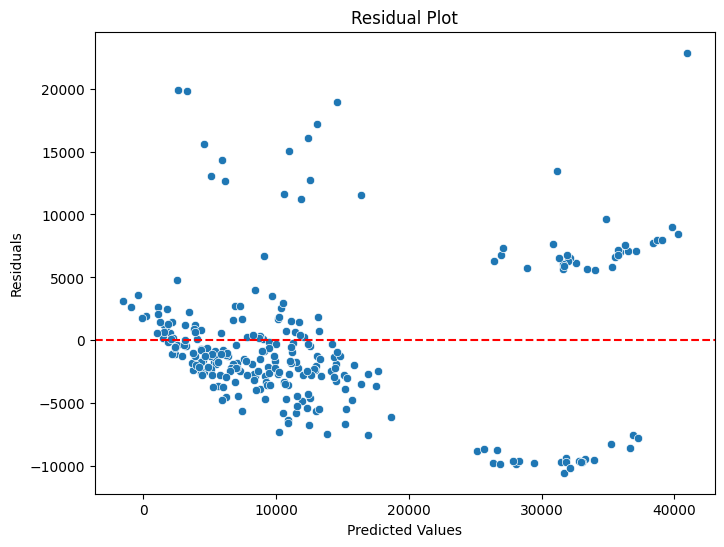

In [29]:
# Calculate residuals
residuals = Y_test - Y_test_pred

# Residual plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=Y_test_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


# Task 9

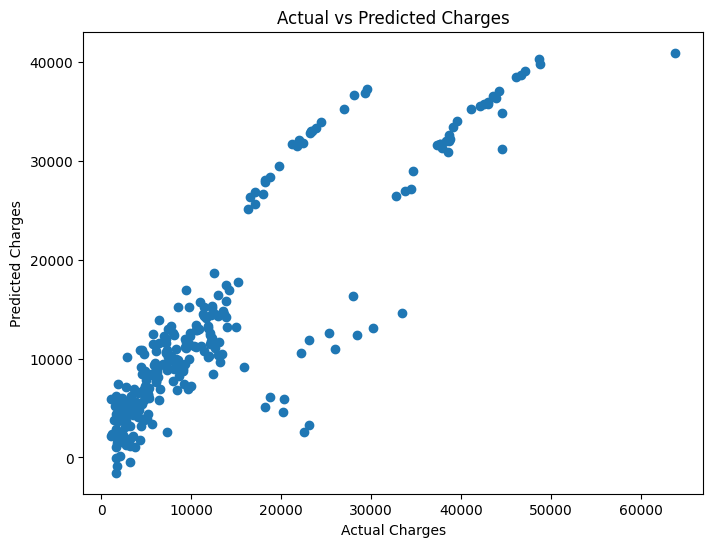

In [30]:
import matplotlib.pyplot as plt

# Actual vs Predicted Charges Plot
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_test_pred)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.show()


# Task 10

**Degrees of Freedom:**
refer to the number of values in the final calculation of a statistic that are free to vary. It's a concept used in various statistical tests, including hypothesis testing and regression analysis.
- In simple terms, degrees of freedom represent the number of independent pieces of information that are available for estimating or calculating a parameter or statistic.
- For example, in a t-test comparing the means of two groups, the degrees of freedom correspond to the sample size of each group minus 1 (df = n1 + n2 - 2).

**Dummy Variables Trap:**
- The dummy variable trap is a situation that arises when dummy variables (binary variables) are used in regression analysis, particularly in the context of multiple linear regression.
- It occurs when one or more dummy variables are highly correlated or perfectly correlated with each other. In other words, one dummy variable can be predicted from the values of the other dummy variables.
- The dummy variable trap results in multicollinearity, which is a situation where independent variables in a regression model are correlated with each other. Multicollinearity can lead to unstable and unreliable coefficient estimates.
- To avoid the dummy variable trap, it's common practice to omit one of the dummy variables from the regression model. This is known as "dropping one level" or "omitting one category." By doing so, you ensure that the dummy variables are not perfectly correlated.